In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pixiedust
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras import optimizers
import keras.backend as K
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from keras.datasets import mnist

np.set_printoptions(suppress=True)
%matplotlib inline

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [25]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [26]:
x_train[0].reshape(28,28)[5:9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
        0.07058824, 0.49411765, 0.53333336, 0.6862745 , 0.10196079,
        0.6509804 , 1.        , 0.96862745, 0.49803922, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11764706, 0.14117648,
        0.36862746, 0.6039216 , 0.6666667 , 0.99215686, 0.99215686,
        0.99215686, 0.99215686, 0.99215686, 0.88235295, 0.6745098 ,
        0.99215686, 0.9490196 , 0.7647059 , 0.2509804 , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.19215687, 0.93333334, 0.99215686,
        0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
        0.99215686, 0.9921

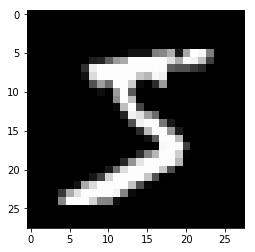

In [27]:
img = x_train[0].reshape(28,28)
plt.imshow(img, cmap=plt.get_cmap('gray'));

In [28]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [29]:
input_shape = (28, 28, 1)

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())         
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.2))                  
model.add(Dense(10, activation='softmax'))

opt = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
__________

In [31]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2, validation_split=0.3, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 51s - loss: 0.1781 - acc: 0.9539 - val_loss: 0.1068 - val_acc: 0.9769
Epoch 2/10
 - 70s - loss: 0.0864 - acc: 0.9807 - val_loss: 0.0829 - val_acc: 0.9821
Epoch 3/10
 - 54s - loss: 0.0645 - acc: 0.9849 - val_loss: 0.0628 - val_acc: 0.9874
Epoch 4/10
 - 49s - loss: 0.0529 - acc: 0.9879 - val_loss: 0.0817 - val_acc: 0.9821
Epoch 5/10
 - 56s - loss: 0.0468 - acc: 0.9891 - val_loss: 0.0712 - val_acc: 0.9861
Epoch 6/10
 - 57s - loss: 0.0393 - acc: 0.9915 - val_loss: 0.0728 - val_acc: 0.9869
Epoch 7/10
 - 53s - loss: 0.0303 - acc: 0.9929 - val_loss: 0.0952 - val_acc: 0.9846
Epoch 8/10
 - 52s - loss: 0.0292 - acc: 0.9932 - val_loss: 0.0778 - val_acc: 0.9892
Epoch 9/10
 - 54s - loss: 0.0283 - acc: 0.9933 - val_loss: 0.0695 - val_acc: 0.9874
Epoch 10/10
 - 52s - loss: 0.0220 - acc: 0.9951 - val_loss: 0.0797 - val_acc: 0.9891


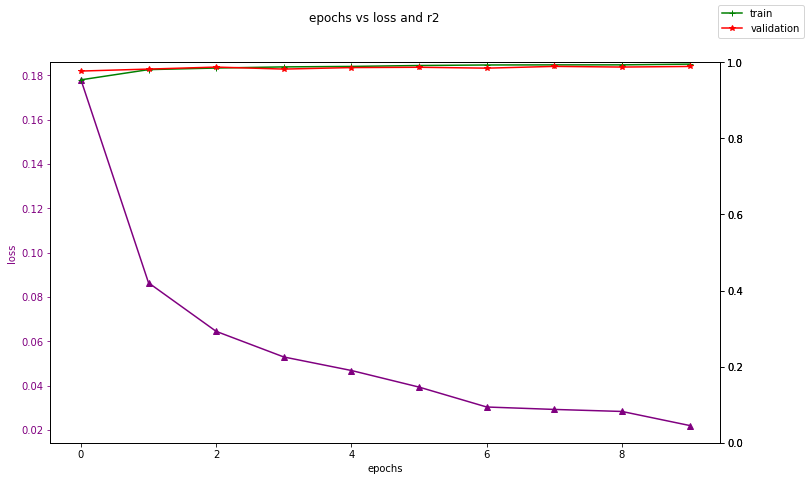

In [35]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['acc'], marker='+', color='green', label='train')
ax2.set_ylim(0,1)

ax3 = ax1.twinx()
plt.plot(history.epoch, history.history['val_acc'], marker='*', color='red', label='validation')
ax3.set_ylim(0,1)

fig.suptitle('epochs vs loss and r2');
fig.legend();